# Mart Sales Prediction using Machine learning

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
data = pd.read_csv('big_mart_Train.csv')

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2469,FDK58,11.35,Regular,0.000000,Snack Foods,103.0016,OUT035,2004,Small,Tier 2,Supermarket Type1,2125.2336
2125,DRE27,11.85,Low Fat,0.132877,Dairy,98.0726,OUT049,1999,Medium,Tier 1,Supermarket Type1,1076.5986
3883,FDG32,19.85,Low Fat,0.175962,Fruits and Vegetables,223.0772,OUT035,2004,Small,Tier 2,Supermarket Type1,1779.0176
2961,DRK13,NaN,Low Fat,0.114610,Soft Drinks,197.0084,OUT027,1985,Medium,Tier 3,Supermarket Type3,3372.9428
7540,FDG59,15.85,Low Fat,0.043411,Starchy Foods,39.4164,OUT018,2009,Medium,Tier 3,Supermarket Type2,154.4656


### number of rows and coumns of the dataset

In [5]:

data.shape

(8523, 12)

### Get information about the dataset like total number of rows, total no of columns, datatypes of each column and memory required

In [6]:

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### check null values

In [7]:

data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
per = data.isnull().sum() * 100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


### Duplicate values

In [10]:

data.duplicated().any()

False

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

### Handle the missing values

In [12]:

data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [13]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

### Filling Missing Values in NUMERICAL Data

1. Univariate - Mean, Median, Mode, Constant value, Interpolation
2. Bivariate - Regression, KNN, ML Models

In [14]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()
print(mean_weight, median_weight)

12.857645184135976 12.6


In [15]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [16]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [17]:
print("Original Weight variance", data['Item_Weight'].var())
print("Item Weight variance after mean imputation", data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation", data['Item_Weight_median'].var())

Original Weight variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


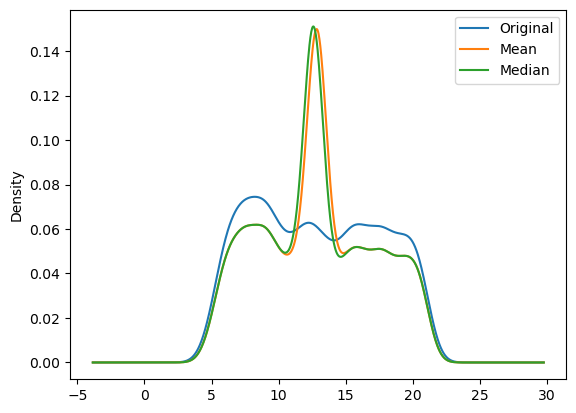

In [18]:
data['Item_Weight'].plot(kind = "kde", label ="Original")

data['Item_Weight_mean'].plot(kind ="kde", label = "Mean")
data['Item_Weight_median'].plot(kind ="kde", label = "Median")

plt.legend()
plt.show()

<Axes: >

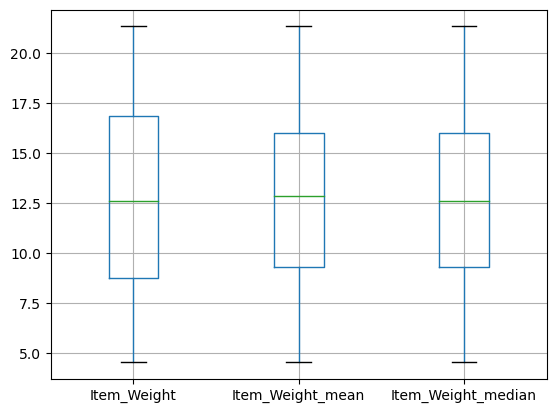

In [19]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [20]:
data['Item_Weight_interploate'] = data['Item_Weight'].interpolate(method="linear")

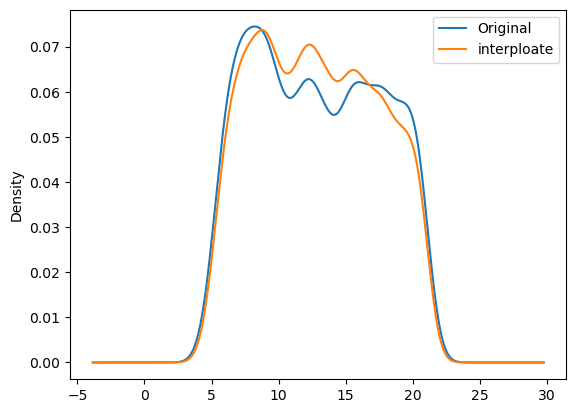

In [21]:
data['Item_Weight'].plot(kind = "kde", label ="Original")
data['Item_Weight_interploate'].plot(kind ='kde', label = 'interploate')

plt.legend()
plt.show()

### Multivariate

In [22]:
from sklearn.impute import KNNImputer

In [23]:
knn = KNNImputer(n_neighbors=10, weights ='distance')

In [24]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

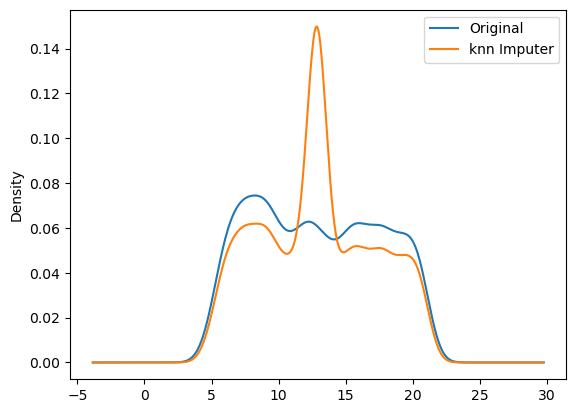

In [25]:
data['Item_Weight'].plot(kind = "kde", label ="Original")
data['knn_imputer'].plot(kind ='kde', label = 'knn Imputer')

plt.legend()
plt.show()

In [26]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'], axis = 1)

In [27]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [29]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [30]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [31]:
mode_outlet = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [32]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [33]:
missing_values = data['Outlet_Size'].isnull()

In [34]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [35]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [36]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

### Item Fat Content

In [37]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [38]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [39]:
data.replace({'Item_Fat_Content': {'Low Fat' : 'LF', 'low fat' : 'LF', 'reg' :'Regular' }}, inplace = True)

In [40]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

### Item visibility

In [41]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [42]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [47]:
data['Item_Visibility_interpolate'] = data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [48]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

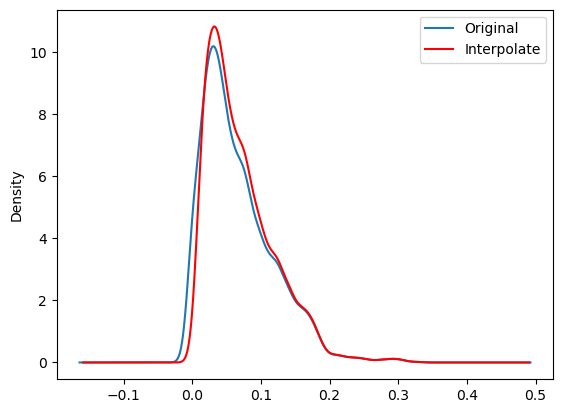

In [49]:
data['Item_Visibility'].plot(kind="kde", label ="Original")

data['Item_Visibility_interpolate'].plot(kind="kde", color='red', label ="Interpolate")

plt.legend()
plt.show()

In [50]:
data = data.drop('Item_Visibility', axis=1)

In [51]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


### Item Type

In [52]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [53]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Item Identifier

In [54]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [55]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
NCL30    4
FDZ35    7
FDU16    3
FDY12    5
NCG30    6
Name: count, dtype: int64

In [56]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x : x[:2])

In [57]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

### Outlet Establishment year

In [58]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [59]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [60]:
import datetime as dt

In [61]:
current_year = dt.datetime.today().year

In [62]:
current_year

2024

In [63]:
data['Outlet_age'] = current_year - data['Outlet_Establishment_Year']

In [64]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [65]:
data = data.drop('Outlet_Establishment_Year', axis =1 )

In [66]:
data

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,LF,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783,37
8519,FD,Regular,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982,22
8520,NC,LF,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186,20
8521,FD,Regular,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221,15


### Handling Categorical Columns

In [67]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include =['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [68]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [69]:
X = data_encoded.drop('Item_Outlet_Sales', axis=1)
y = data_encoded['Item_Outlet_Sales']

In [70]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators =100, random_state = 42)

scores = cross_val_score(rf,X,y,cv=5, scoring='r2')

print(scores.mean())

0.5549992903957147


### XGBRFRegressor

In [72]:
!pip install xgboost

In [73]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(xg, X, y, cv=5, scoring='r2')

print(scores.mean())

0.5956602202104594


In [75]:
xg = XGBRFRegressor(n_estimators =100, random_state =42)

xg1 = xg.fit(X,y)

pd.DataFrame ({
    'feature': X.columns,
    'XGBRF_importance': xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.423386
10,Outlet_age,0.169442
3,Item_MRP,0.160600
5,Outlet_Size,0.101296
4,Outlet_Identifier,0.099362
6,Outlet_Location_Type,0.036353
9,Item_Visibility_interpolate,0.003181
8,Item_Weight_interploate,0.002475
2,Item_Type,0.002263
0,Item_Identifier,0.000967


### Dropping the below columns we check the mean score values

In [76]:
['Item_Visibility_interpolate','Item_Weight_interploate','Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate\t',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [78]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(xg1, X.drop(['Item_Visibility_interpolate','Item_Weight_interploate','Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'], axis =1), y, cv=5, scoring='r2')

print(scores.mean())

0.596332173045327


### Final DataFrame

In [79]:
final_data = X.drop(columns =['Item_Visibility_interpolate','Item_Weight_interploate','Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'], axis = 1)

In [80]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


### Best Model

In [81]:
from xgboost import XGBRFRegressor

In [82]:
xg_final = XGBRFRegressor()

In [83]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [85]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,test_size=0.20, random_state=42)

In [86]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [87]:
y_pred = xg_final.predict(X_test)

In [88]:
mean_absolute_error(y_test,y_pred)

713.5792228647217

### Prediction on Unseen Data

In [95]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2058.0156


In [96]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1343.595625 and 2772.435625


### SAVE model using Joblib

In [97]:
import joblib

In [98]:
joblib.dump(xg_final, 'bigmart_model')

['bigmart_model']

In [100]:
model = joblib.load('bigmart_model')

In [103]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2058.0156


### FINAL SALES PREDICTION

In [104]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1343.595625 and 2772.435625


## GUI FOR PREDICTION

In [121]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib

In [122]:
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales Amount is in between").grid(row=8)
    Label(master, text=float(result) -714.42 ).grid(row=10)
    Label(master, text="and").grid(row=11)
    Label(master, text=float(result) + 714.42) .grid(row=12)
    print("Sales amount", result)
    

In [123]:
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " MART SALES PREDICTION USING ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

In [124]:
# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()